In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import os
import pickle
import gzip

from fancyimpute import KNN, MatrixFactorization

In [5]:
OK = pd.DataFrame()
NG = pd.DataFrame()
all_ = pd.DataFrame()
for i in ['2018', '2019', '2020', '2021']:
    ok = pd.read_pickle(f'./numble_pickle/OK_{i}.pkl')
    ng = pd.read_pickle(f'./numble_pickle/NG_{i}.pkl')
    ok['OK/NG'] = 0
    ng['OK/NG'] = 1
    all_data = pd.concat([ok,ng])
    all_data = all_data[[all_data.columns[-1]]+ list(all_data.columns[:-1])]


   # 추가 Feature 생성
    all_data['이자보상배율'] = all_data['영업이익（손실）'] / (all_data['금융비용대부채비율(%)'] * all_data['부  채  총  계'])
    all_data['매출액대비자산'] = (all_data['매출채권'] + all_data['재고자산']) / all_data['매출액'] * 100
    all_data['비유동장기적합률'] = all_data['비유동자산'] / (all_data['자기자본비율(%)'] * all_data['자본총계'] / 100 + all_data['비유동부채']) * 100
    all_data['자기자본순이익률'] = all_data['당기순이익(손실)'] / (all_data['자기자본비율(%)'] * all_data['자산총계'] / 100) * 100
    all_data['유동비율'] = all_data['유동자산'] / all_data['유동부채'] * 100
    all_data['총자본순이익률'] = all_data['당기순이익(손실)'] / all_data['자산총계'] * 100
    all_data['금융비용대총자산'] = all_data['금융비용대부채비율(%)'] * all_data['부  채  총  계'] / all_data['자산총계']
    all_data['당좌비율'] = (all_data['유동자산'] - all_data['재고자산']) / all_data['유동부채'] * 100
    
    # categorical variable
    all_cate = all_data[all_data.columns[:35]]
    # numerical variable
    all_num = all_data[all_data.columns[35:]]
    
    #numerical variable의 NAN 값에대하여 KNN imputation 시행
    all_num_filled_KNN = pd.DataFrame(KNN(k=5).fit_transform(all_num))
    all_num_filled_KNN.columns = all_num.columns
    all_filled_KNN = pd.concat([all_cate.reset_index(drop=True), all_num_filled_KNN.reset_index(drop=True)], axis = 1)
    
    # data merge
    all_ = pd.concat([all_, all_filled_KNN])
all_data = all_

/root/anaconda3/lib/python3.7/site-packages/knnimpute/normalized_distance.py:62: RuntimeWarning: invalid value encountered in subtract
  np.subtract(X, x.reshape((1, n_cols)), out=diffs)


Imputing row 1/24157 with 0 missing, elapsed time: 180.831
Imputing row 101/24157 with 1 missing, elapsed time: 180.871
Imputing row 201/24157 with 1 missing, elapsed time: 180.889
Imputing row 301/24157 with 0 missing, elapsed time: 180.908
Imputing row 401/24157 with 4 missing, elapsed time: 180.926
Imputing row 501/24157 with 0 missing, elapsed time: 180.946
Imputing row 601/24157 with 1 missing, elapsed time: 180.963
Imputing row 701/24157 with 3 missing, elapsed time: 180.983
Imputing row 801/24157 with 5 missing, elapsed time: 181.003
Imputing row 901/24157 with 1 missing, elapsed time: 181.020
Imputing row 1001/24157 with 1 missing, elapsed time: 181.041
Imputing row 1101/24157 with 0 missing, elapsed time: 181.058
Imputing row 1201/24157 with 2 missing, elapsed time: 181.073
Imputing row 1301/24157 with 4 missing, elapsed time: 181.094
Imputing row 1401/24157 with 1 missing, elapsed time: 181.113
Imputing row 1501/24157 with 0 missing, elapsed time: 181.135
Imputing row 1601/24

/root/anaconda3/lib/python3.7/site-packages/knnimpute/normalized_distance.py:62: RuntimeWarning: invalid value encountered in subtract
  np.subtract(X, x.reshape((1, n_cols)), out=diffs)


Imputing row 1/23701 with 2 missing, elapsed time: 181.141
Imputing row 101/23701 with 6 missing, elapsed time: 181.166
Imputing row 201/23701 with 5 missing, elapsed time: 181.187
Imputing row 301/23701 with 1 missing, elapsed time: 181.209
Imputing row 401/23701 with 5 missing, elapsed time: 181.229
Imputing row 501/23701 with 8 missing, elapsed time: 181.253
Imputing row 601/23701 with 1 missing, elapsed time: 181.276
Imputing row 701/23701 with 2 missing, elapsed time: 181.297
Imputing row 801/23701 with 0 missing, elapsed time: 181.317
Imputing row 901/23701 with 1 missing, elapsed time: 181.336
Imputing row 1001/23701 with 1 missing, elapsed time: 181.361
Imputing row 1101/23701 with 1 missing, elapsed time: 181.380
Imputing row 1201/23701 with 1 missing, elapsed time: 181.398
Imputing row 1301/23701 with 1 missing, elapsed time: 181.418
Imputing row 1401/23701 with 3 missing, elapsed time: 181.439
Imputing row 1501/23701 with 1 missing, elapsed time: 181.464
Imputing row 1601/23

/root/anaconda3/lib/python3.7/site-packages/knnimpute/normalized_distance.py:62: RuntimeWarning: invalid value encountered in subtract
  np.subtract(X, x.reshape((1, n_cols)), out=diffs)


Imputing row 1/23432 with 1 missing, elapsed time: 167.387
Imputing row 101/23432 with 1 missing, elapsed time: 167.407
Imputing row 201/23432 with 0 missing, elapsed time: 167.425
Imputing row 301/23432 with 4 missing, elapsed time: 167.444
Imputing row 401/23432 with 1 missing, elapsed time: 167.462
Imputing row 501/23432 with 1 missing, elapsed time: 167.482
Imputing row 601/23432 with 0 missing, elapsed time: 167.501
Imputing row 701/23432 with 0 missing, elapsed time: 167.519
Imputing row 801/23432 with 1 missing, elapsed time: 167.535
Imputing row 901/23432 with 6 missing, elapsed time: 167.550
Imputing row 1001/23432 with 2 missing, elapsed time: 167.568
Imputing row 1101/23432 with 1 missing, elapsed time: 167.586
Imputing row 1201/23432 with 0 missing, elapsed time: 167.602
Imputing row 1301/23432 with 2 missing, elapsed time: 167.619
Imputing row 1401/23432 with 1 missing, elapsed time: 167.639
Imputing row 1501/23432 with 0 missing, elapsed time: 167.658
Imputing row 1601/23

/root/anaconda3/lib/python3.7/site-packages/knnimpute/normalized_distance.py:62: RuntimeWarning: invalid value encountered in subtract
  np.subtract(X, x.reshape((1, n_cols)), out=diffs)


Imputing row 1/24058 with 1 missing, elapsed time: 178.315
Imputing row 101/24058 with 0 missing, elapsed time: 178.337
Imputing row 201/24058 with 0 missing, elapsed time: 178.356
Imputing row 301/24058 with 0 missing, elapsed time: 178.377
Imputing row 401/24058 with 1 missing, elapsed time: 178.396
Imputing row 501/24058 with 1 missing, elapsed time: 178.417
Imputing row 601/24058 with 1 missing, elapsed time: 178.436
Imputing row 701/24058 with 6 missing, elapsed time: 178.456
Imputing row 801/24058 with 1 missing, elapsed time: 178.474
Imputing row 901/24058 with 6 missing, elapsed time: 178.491
Imputing row 1001/24058 with 1 missing, elapsed time: 178.512
Imputing row 1101/24058 with 3 missing, elapsed time: 178.531
Imputing row 1201/24058 with 1 missing, elapsed time: 178.550
Imputing row 1301/24058 with 5 missing, elapsed time: 178.568
Imputing row 1401/24058 with 0 missing, elapsed time: 178.590
Imputing row 1501/24058 with 1 missing, elapsed time: 178.613
Imputing row 1601/24

In [10]:
all_data = all_data.reset_index(drop=True)

In [11]:
all_data

,CMP_NM,BIZ_NO,CMP_PFIX_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,...,재고자산,OK/NG,이자보상배율,매출액대비자산,비유동장기적합률,자기자본순이익률,유동비율,총자본순이익률,금융비용대총자산,당좌비율
0,NaN,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2.0,2.0,1.0,...,7.489100e+05,0.0,2.680883e-02,22.386537,1.707557e+02,4.643289e+00,89.818117,2.285381,8.424600e-01,79.790088
1,NaN,2148612093,(주),센트로,NaN,"HOTEL CENTRO CO.,LTD.",M,2.0,2.0,1.0,...,4.641491e+05,0.0,-4.734860e-02,33.397403,1.087893e+03,-4.792311e+01,2.175752,-6.147097,1.092282e+00,73.524331
2,NaN,2068148256,(주),엄앤드이종합건축사사무소,NaN,"Aum & Lee Architects & Associates Co., Ltd",M,2.0,2.0,1.0,...,2.031481e+06,0.0,9.241081e-02,28.652936,1.717208e+01,7.060586e+00,3699.521774,5.601092,6.622844e-01,184.585801
3,NaN,1078156099,(주),세풍폴리머,NaN,"Sepoong Polymer Co., Ltd.",M,2.0,2.0,1.0,...,3.281039e+06,0.0,1.569199e-02,43.549625,2.446452e+02,3.558222e+00,62.814372,0.845398,1.925092e+00,31.914657
4,NaN,5148140835,NaN,한국대풍,(주),"TAIHO CORPORATION OF KOREA CO.,LTD.",M,2.0,2.0,1.0,...,3.765868e+06,0.0,inf,27.497587,4.218895e+01,1.792002e+01,415.825305,15.916207,0.000000e+00,297.065334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95343,세진건설,1958701540,(주),NaN,NaN,"Sejin Construction Co., Ltd.",M,2.0,2.0,1.0,...,3.160000e+04,1.0,inf,16.933163,6.999188e+01,1.401197e+01,771.656236,13.162845,0.000000e+00,656.680250
95344,코람코암사프로젝트금융투자,6398701583,NaN,NaN,(주),"KORAMKOAMSA PRO JEKTEU FINANCE INVESTMENT CO.,...",M,2.0,2.0,1.0,...,4.365229e+05,1.0,-2.279829e-03,7.779466,1.107793e-07,-2.343389e-10,2.097010,-2.343389,1.966238e+00,31.437270
95345,효인테드홀딩스,7408701753,(주),NaN,NaN,"Hyoin TED Holdings Co., Ltd.",M,2.0,2.0,1.0,...,4.643488e+06,1.0,-1.336492e-16,-107.125786,2.709106e-05,-1.257859e-12,100.018906,-0.012579,9.998110e+11,573.572279
95346,동경토건,6228701741,(주),NaN,NaN,"Donggyeong Construction Co., Ltd.",M,2.0,2.0,1.0,...,5.219410e+06,1.0,-inf,51.662820,-1.430925e+02,-1.499799e+01,5844.091619,-14.741371,0.000000e+00,589.703681


In [12]:
# CMP_NM 과 CMP_NM1 컬럼 결합
temp = all_data[['CMP_NM','CMP_NM1']].fillna("")
all_data['CMP_NM'] = temp['CMP_NM']+""+temp['CMP_NM1']
all_data = all_data.drop(['CMP_NM1'],axis=1)

In [13]:
# BZ_TYP 별 데이터 개수
dd = all_data.groupby(['BZ_TYP','OK/NG']).size().unstack().fillna(0)
dd = dd.reset_index()
dd.columns = ['BZ_TYP', 'OK', 'NG']
dd

,BZ_TYP,OK,NG
0,B,1.0,0.0
1,M,93301.0,1827.0
2,O,211.0,0.0
3,V,8.0,0.0


In [14]:
### BZ_TYP이 M인 회사만 분석
all_data = all_data[all_data.BZ_TYP == 'M']
all_data = all_data.reset_index(drop = True)

In [16]:
all_data.columns

Index(['CMP_NM', 'BIZ_NO', 'CMP_PFIX_NM', 'CMP_SFIX_NM', 'CMP_ENM', 'BZ_TYP',
       'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN',
       'VENT_YN', 'LIST_CD', 'IND_CD_ORDR', 'IND_CD1', 'IND_CD2', 'IND_CD3',
       'PB_ORG_TYP', 'MDSCO_PRTC_YN', 'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB',
       'LIST_DATE', 'MN_BIZ_CONT', 'NATN_NM', 'HOMEPAGE_URL', 'CEO_NM',
       'EMP_CNT', 'END_DATE', 'STRT_DATE', 'CLSBZ_GB', 'STAT_OCR_DATE',
       'label', '결산년월', '유동자산', '매출채권', '비유동자산', '유형자산', '자산총계', '유동부채',
       '비유동부채', '부  채  총  계', '자본금', '이익잉여금(결손금）', '자본총계', '매출액', '판매비와관리비',
       '영업이익（손실）', '법인세비용차감전순손익', '법인세비용', '당기순이익(손실)', '기업순이익률(%)',
       '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)', '매출액영업이익률(%)', '매출액순이익률(%)',
       '수지비율(%)', '경상수지비율', '영업비율(%)', '금융비용대매출액비율(%', '금융비용대부채비율(%)',
       '금융비용대총비용비율(%', '부채비율(%)', '차입금의존도(%)', '자기자본비율(%)', '순운전자본비율(%)',
       '유동부채비율(%)', '비유동부채비율(%)', '부채총계대 매출액(%)', '총자본회전율(회)', '재고자산회전율(회)',
       '매출채권회전율(회)', '매입채무회

In [17]:
#### 컬럼 별 NA 비율
#### KNN imputation 처리 후 이므로 0
all_data[['PBCO_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN', 'VENT_YN',
       '결산년월', '유동자산', '매출채권', '비유동자산', '유형자산', '자산총계', '유동부채',
       '비유동부채', '부  채  총  계', '자본금', '이익잉여금(결손금）', '자본총계', '매출액', '판매비와관리비',
       '영업이익（손실）', '법인세비용차감전순손익', '법인세비용', '당기순이익(손실)', '기업순이익률(%)',
       '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)', '매출액영업이익률(%)', '매출액순이익률(%)',
       '수지비율(%)', '경상수지비율', '영업비율(%)', '금융비용대매출액비율(%', '금융비용대부채비율(%)',
       '금융비용대총비용비율(%', '부채비율(%)', '차입금의존도(%)', '자기자본비율(%)', '순운전자본비율(%)',
       '유동부채비율(%)', '비유동부채비율(%)', '부채총계대 매출액(%)', '총자본회전율(회)', '재고자산회전율(회)',
       '매출채권회전율(회)', '매입채무회전율(회)', '미수금', '매출원가', '무형자산', '재고자산','이자보상배율', '매출액대비자산', '비유동장기적합률', 
       '자기자본순이익률', '유동비율', '총자본순이익률','금융비용대총자산', '당좌비율']].isna().mean()*100

PBCO_GB            0.0
HDOF_BR_GB         0.0
FR_IVST_CORP_YN    0.0
VENT_YN            0.0
결산년월               0.0
유동자산               0.0
매출채권               0.0
비유동자산              0.0
유형자산               0.0
자산총계               0.0
유동부채               0.0
비유동부채              0.0
부  채  총  계         0.0
자본금                0.0
이익잉여금(결손금）         0.0
자본총계               0.0
매출액                0.0
판매비와관리비            0.0
영업이익（손실）           0.0
법인세비용차감전순손익        0.0
법인세비용              0.0
당기순이익(손실)          0.0
기업순이익률(%)          0.0
유보액/총자산(%)         0.0
유보액/납입자본(%)        0.0
매출액총이익률(%)         0.0
매출액영업이익률(%)        0.0
매출액순이익률(%)         0.0
수지비율(%)            0.0
경상수지비율             0.0
영업비율(%)            0.0
금융비용대매출액비율(%       0.0
금융비용대부채비율(%)       0.0
금융비용대총비용비율(%       0.0
부채비율(%)            0.0
차입금의존도(%)          0.0
자기자본비율(%)          0.0
순운전자본비율(%)         0.0
유동부채비율(%)          0.0
비유동부채비율(%)         0.0
부채총계대 매출액(%)       0.0
총자본회전율(회)          0.0
재고자산회전율(회)         0.0
매출채권회전율(회) 

In [25]:
#### 추가 feature 계산 과정에서 -inf, inf 생성됨
all_data[['이자보상배율', '매출액대비자산', '비유동장기적합률', '자기자본순이익률', '유동비율', '총자본순이익률',
       '금융비용대총자산', '당좌비율']].describe()

,이자보상배율,매출액대비자산,비유동장기적합률,자기자본순이익률,유동비율,총자본순이익률,금융비용대총자산,당좌비율
count,9.512800e+04,9.512800e+04,95128.000000,9.512800e+04,9.512800e+04,95128.000000,9.512800e+04,9.512800e+04
mean,NaN,4.369885e+02,175.359743,8.742397e+00,inf,1.610724,3.326864e+10,inf
std,NaN,3.416444e+04,1409.337427,1.891391e+02,NaN,45.250666,1.973742e+11,NaN
min,-inf,-5.027872e+05,-290.939453,-1.379020e+04,-1.876932e+04,-5551.056111,0.000000e+00,-3.679409e+03
25%,-1.057545e-13,1.486961e+01,29.644817,-1.713254e-10,6.853595e+01,-0.659294,3.383491e-01,4.180324e+01
50%,2.018318e-02,2.625626e+01,101.250086,4.866828e+00,1.230201e+02,2.036606,1.167488e+00,8.852448e+01
75%,1.142101e-01,4.726129e+01,166.634054,1.526270e+01,2.308588e+02,6.634145,2.138441e+00,1.817323e+02
max,inf,8.226613e+06,200893.203435,3.176836e+04,inf,8716.633406,1.451998e+13,inf


In [26]:
#### 이자보생배율 +-inf 아닌 min,max 값 확인
print(all_data[all_data['이자보상배율'] != -np.inf].이자보상배율.min())
print(all_data[all_data['이자보상배율'] != np.inf].이자보상배율.max())

-5169.986402996112
11831.683628961908


In [27]:
#### 유동비율 +-inf 아닌 min,max 값 확인
print(all_data[all_data['유동비율'] != -np.inf].유동비율.min())
print(all_data[all_data['유동비율'] != np.inf].유동비율.max())

-18769.316890006543
50719866.66666667


In [28]:
#### 당좌비율 +-inf 아닌 min,max 값 확인
print(all_data[all_data['당좌비율'] != -np.inf].당좌비율.min())
print(all_data[all_data['당좌비율'] != np.inf].당좌비율.max())

-3679.4089958158997
28809268.333333336


In [29]:
### -inf값은 각각의 컬럼의 min보다 작은 값으로 대체
### inf값은 각각의 컬럼의 max보다 큰 값으로 대체
all_data.loc[all_data['이자보상배율'] == -np.inf,'이자보상배율'] = -99999
all_data.loc[all_data['이자보상배율'] == np.inf,'이자보상배율'] = 99999
all_data.loc[all_data['유동비율'] == -np.inf,'유동비율'] = -99999
all_data.loc[all_data['유동비율'] == np.inf,'유동비율'] = 90000000
all_data.loc[all_data['당좌비율'] == -np.inf,'당좌비율'] = -99999
all_data.loc[all_data['당좌비율'] == np.inf,'당좌비율'] = 90000000

In [30]:
all_data[['이자보상배율', '매출액대비자산', '비유동장기적합률', '자기자본순이익률', '유동비율', '총자본순이익률',
       '금융비용대총자산', '당좌비율']].describe()

,이자보상배율,매출액대비자산,비유동장기적합률,자기자본순이익률,유동비율,총자본순이익률,금융비용대총자산,당좌비율
count,9.512800e+04,9.512800e+04,95128.000000,9.512800e+04,9.512800e+04,95128.000000,9.512800e+04,9.512800e+04
mean,3.693759e+03,4.369885e+02,175.359743,8.742397e+00,1.042384e+04,1.610724,3.326864e+10,1.253063e+04
std,3.196557e+04,3.416444e+04,1409.337427,1.891391e+02,8.576298e+05,45.250666,1.973742e+11,9.789146e+05
min,-9.999900e+04,-5.027872e+05,-290.939453,-1.379020e+04,-1.876932e+04,-5551.056111,0.000000e+00,-3.679409e+03
25%,-1.057545e-13,1.486961e+01,29.644817,-1.713254e-10,6.853595e+01,-0.659294,3.383491e-01,4.180324e+01
50%,2.018318e-02,2.625626e+01,101.250086,4.866828e+00,1.230201e+02,2.036606,1.167488e+00,8.852448e+01
75%,1.142101e-01,4.726129e+01,166.634054,1.526270e+01,2.308588e+02,6.634145,2.138441e+00,1.817323e+02
max,9.999900e+04,8.226613e+06,200893.203435,3.176836e+04,9.000000e+07,8716.633406,1.451998e+13,9.000000e+07


In [31]:
#### 카테고리컬 변수 확인
#### FR_IVST_CORP_YN, VENT_YN 인코딩 필요
for n_n in ['PBCO_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN', 'VENT_YN']:
    print(n_n)
    print(all_data[n_n].unique())

PBCO_GB
[2. 1.]
HDOF_BR_GB
[1. 2.]
FR_IVST_CORP_YN
['N' 'Y']
VENT_YN
['N' 'Y']


In [32]:
#### 학습에 사용된 변수
X = all_data[['PBCO_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN', 'VENT_YN',
       '유동자산', '매출채권', '비유동자산', '유형자산', '자산총계', '유동부채',
       '비유동부채', '부  채  총  계', '자본금', '이익잉여금(결손금）', '자본총계', '매출액', '판매비와관리비',
       '영업이익（손실）', '법인세비용차감전순손익', '법인세비용', '당기순이익(손실)', '기업순이익률(%)',
       '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)', '매출액영업이익률(%)', '매출액순이익률(%)',
       '수지비율(%)', '경상수지비율', '영업비율(%)', '금융비용대매출액비율(%', '금융비용대부채비율(%)',
       '금융비용대총비용비율(%', '부채비율(%)', '차입금의존도(%)', '자기자본비율(%)', '순운전자본비율(%)',
       '유동부채비율(%)', '비유동부채비율(%)', '부채총계대 매출액(%)', '총자본회전율(회)', '재고자산회전율(회)',
       '매출채권회전율(회)', '매입채무회전율(회)', '미수금', '매출원가', '무형자산', '재고자산','이자보상배율', '매출액대비자산', '비유동장기적합률', 
       '자기자본순이익률', '유동비율', '총자본순이익률','금융비용대총자산', '당좌비율']]

In [33]:
### 카테고리형 변수 인코딩
X['FR_IVST_CORP_YN'] = pd.get_dummies(X.FR_IVST_CORP_YN, prefix='FR_IVST_CORP_YN' , drop_first=True)
X['VENT_YN'] = pd.get_dummies(X.VENT_YN, prefix='VENT_YN' , drop_first=True)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
X

,PBCO_GB,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,...,무형자산,재고자산,이자보상배율,매출액대비자산,비유동장기적합률,자기자본순이익률,유동비율,총자본순이익률,금융비용대총자산,당좌비율
0,2.0,1.0,0,0,6707767.0,4.761791e+06,1.482046e+07,1.298959e+07,21528231.0,7468167.0,...,6.504000e+04,7.489100e+05,2.680883e-02,22.386537,1.707557e+02,4.643289e+00,89.818117,2.285381,8.424600e-01,79.790088
1,2.0,1.0,0,0,136602.0,1.400000e+01,7.732413e+06,7.732413e+06,7869015.0,6278382.0,...,1.686734e+05,4.641491e+05,-4.734860e-02,33.397403,1.087893e+03,-4.792311e+01,2.175752,-6.147097,1.092282e+00,73.524331
2,2.0,1.0,0,0,10412563.0,6.864109e+06,1.688987e+06,1.239990e+05,12101550.0,281457.0,...,1.128000e+04,2.031481e+06,9.241081e-02,28.652936,1.717208e+01,7.060586e+00,3699.521774,5.601092,6.622844e-01,184.585801
3,2.0,1.0,0,0,6669848.0,2.796782e+06,1.257399e+07,7.863773e+06,19243837.0,10618347.0,...,4.050608e+06,3.281039e+06,1.569199e-02,43.549625,2.446452e+02,3.558222e+00,62.814372,0.845398,1.925092e+00,31.914657
4,2.0,1.0,1,0,13185783.0,4.828705e+06,1.517263e+07,1.458546e+07,28358409.0,3170991.0,...,2.111620e+05,3.765868e+06,9.999900e+04,27.497587,4.218895e+01,1.792002e+01,415.825305,15.916207,0.000000e+00,297.065334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95123,2.0,1.0,0,0,212082.0,1.750000e+05,2.414000e+05,9.040000e+02,453481.0,27484.0,...,1.273808e+04,3.160000e+04,9.999900e+04,16.933163,6.999188e+01,1.401197e+01,771.656236,13.162845,0.000000e+00,656.680250
95124,2.0,1.0,0,0,265773.0,7.215891e+03,1.803375e+07,1.803375e+07,18299519.0,12673904.0,...,2.218513e+06,4.365229e+05,-2.279829e-03,7.779466,1.107793e-07,-2.343389e-10,2.097010,-2.343389,1.966238e+00,31.437270
95125,2.0,1.0,0,0,31768269.0,1.129574e+03,9.270465e+06,5.876853e+04,31768269.0,31762264.0,...,4.127912e+06,4.643488e+06,-1.336492e-16,-107.125786,2.709106e-05,-1.257859e-12,100.018906,-0.012579,9.998110e+11,573.572279
95126,2.0,1.0,0,0,561325.0,2.200000e+05,2.833936e+05,5.112504e+04,561325.0,9605.0,...,5.280006e+03,5.219410e+06,-9.999900e+04,51.662820,-1.430925e+02,-1.499799e+01,5844.091619,-14.741371,0.000000e+00,589.703681


In [35]:
y = all_data['OK/NG']

In [36]:
##### 5-fold cross validation 이용하여 성능 평가
##### XGB classifier 이용하여 학습
f1_scores = []
precision_scores = []
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    #clf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
    clf = XGBClassifier(n_estimators=200)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     18661
         1.0       0.60      0.25      0.35       365

    accuracy                           0.98     19026
   macro avg       0.79      0.62      0.67     19026
weighted avg       0.98      0.98      0.98     19026

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18660
         1.0       0.53      0.40      0.46       366

    accuracy                           0.98     19026
   macro avg       0.76      0.70      0.72     19026
weighted avg       0.98      0.98      0.98     19026

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     18660
         1.0       0.69      0.35      0.47       366

    accuracy                           0.98     19026
   macro avg       0.84      0.67      0.73     19026
weighted avg       0.98      0.98      0.98     19026

              preci

In [37]:
#### 5-fold cross validation 평균 f1 score
print(np.mean(f1_scores))

0.43459023652752327


In [38]:
#### 5-fold cross validation 평균 precision
print(np.mean(precision_scores))

0.7161048133186008


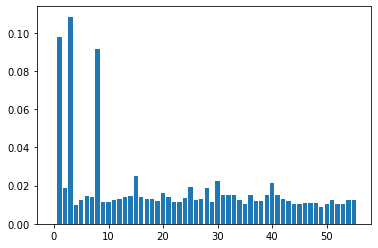

In [41]:
# 변수 별 중요도 확인
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

In [40]:
#### VENT_YN,HDOF_BR_GB,자산총계 순서로 중요한 feature
X.columns[clf.feature_importances_ > 0.06]

Index(['HDOF_BR_GB', 'VENT_YN', '자산총계'], dtype='object')